In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Cargar el conjunto de datos
df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")

# df_partidos_cebollitas = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos_cebollitas = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']
df_partidos_cebollitas.reset_index(drop=True, inplace=True)
df_partidos = df_partidos_cebollitas.copy()

# Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Variables predictoras
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# Division estandar: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Entrenar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl = LinearRegression()
model_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_rl.predict(X_test)

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error Cuadrático Medio (MSE): 6.38
Raíz del Error Cuadrático Medio (RMSE): 2.53
Error Absoluto Medio (MAE): 2.01
Coeficiente de determinación (R²): -1.73


### Nota: ¿Qué significa un R² negativo?
Un valor de R² negativo indica que tu modelo predictivo es peor que un modelo muy simple que simplemente predice el valor promedio de la variable objetivo para todas las observaciones.

En otras palabras:

* R² = 1: El modelo explica el 100% de la variabilidad de los datos (ajuste perfecto).
* R² = 0: El modelo no es mejor ni peor que simplemente usar la media como predicción.
* R² < 0: El modelo es activamente malo. Las predicciones están más lejos de los valores reales que si hubieras usado la media.

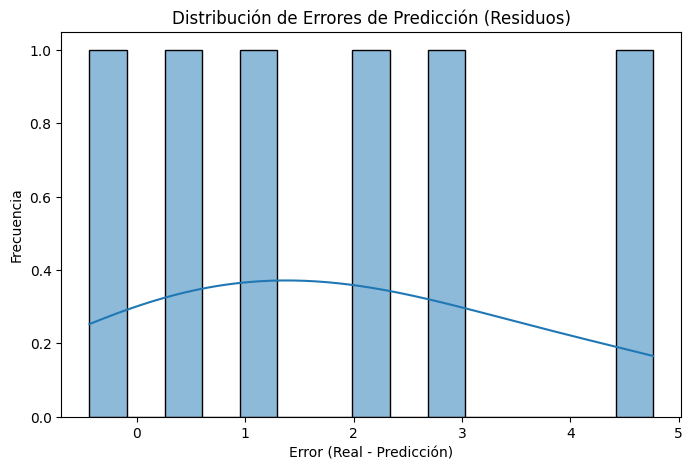

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title("Distribución de Errores de Predicción (Residuos)")
plt.xlabel("Error (Real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

# Interpretación rápida

* **MSE/RMSE**: Cuanto más cercano de 0, mejor. Indica cuanto se alejan las predicciones.
* **MAE**: Error promedio en goles. Fácil de entender. Un MAE de 0.8 -> error promedio de 0.8 goles.
* **R²**: Cuanto explica el modelo del comportamiento real. 1 es perfecto, 0 es como adivinar.

In [6]:
import ipywidgets as widgets

def evaluar_predicciones(threshold_mac):
    calidad = "buena" if mae <= threshold_mac else "regular o mala"
    print(f"Tu modelo tiene una MAE de {mae:.2f}, considerada {calidad} (umbral definido: {threshold_mac}).")

umbral_widget = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Umbral MAE:')
widgets.interactive(evaluar_predicciones, threshold_mac=umbral_widget)

interactive(children=(FloatSlider(value=1.0, description='Umbral MAE:', max=5.0, min=0.1), Output()), _dom_cla…